In [1]:
import pandas as pd
import seaborn
spots = pd.read_csv("spots_08_Sep_2024@1929.tsv", sep="\t", header=0)

spots.loc[(spots["Time"] >= "2024-09-08 16:12") & (spots["Time"] <= "2024-09-08 16:42"), "Antenna"] = "EFHW"
spots.loc[(spots["Time"] >= "2024-09-08 17:38") & (spots["Time"] <= "2024-09-08 18:08"), "Antenna"] = "RW Choke"
rx_spots = spots[spots["RX"] == "K3FNB"]
tx_spots = spots[spots["TX"] == "K3FNB"]

# Overview

For each antenna I ran WSPR for 30minutes on 20m. I compared two antennas, a EFHW that I built and a random wire antenna using LDG's 9:1 Unun and a choke.

The random wire was 41' to fit into my 35 foot backyard. It was installed as sloper with the feed point hanging our my second story window. The other end of the antenna was tied off to by back fence. 25' of coax was used as a counterpoise and a choke was installed before the feedline enters my house.

The EFHW is a DIY 49:1 Unun. In order to fit the antenna into my 35 foot backyard and still tune 40m. The wire is split into two sections with a shorty 40 coil in between the sections.

## TX

Transmission with both antennas has a roughly the same distributes. Centering around -15 dB. The EFHW was heard by far more stations than the random wire for the same period of 30minutes.

In [2]:
tx_spots.groupby("Antenna")[["SNR"]].describe()

SNR                                                  
           count       mean       std   min   25%   50%  75%   max
Antenna                                                           
EFHW      1033.0 -14.934172  9.473214 -34.0 -22.0 -17.0 -9.0  16.0
RW Choke   486.0 -15.125514  7.972031 -33.0 -21.0 -16.0 -9.0  11.0

<Axes: xlabel='Count', ylabel='SNR'>

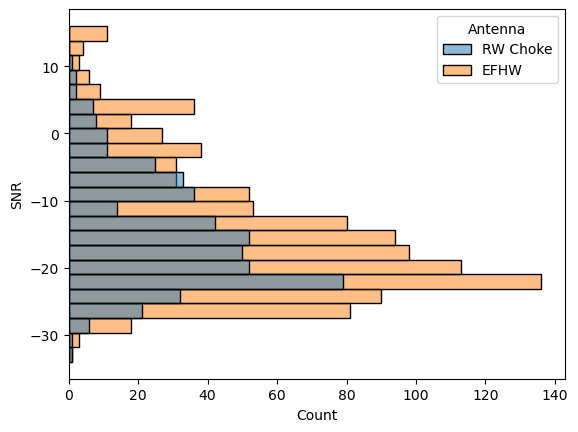

In [3]:
seaborn.histplot(tx_spots, hue="Antenna", y="SNR")

## RX

Reception was a different story and it reflects my personal experience. The 41' random wire had a harder time hearing stations. In the 30m period, the EFHW heard 77 stations, but the random wire only heard 27 stations.

As you can see below, the average SNR for the random wire was around -22 dB. Whereas the EFHW's average SNR was -16

In [4]:
rx_spots.groupby("Antenna")[["SNR"]].describe()

SNR                                                  
         count       mean       std   min   25%   50%   75%  max
Antenna                                                         
EFHW      77.0 -15.922078  6.406753 -28.0 -21.0 -16.0 -13.0  4.0
RW Choke  27.0 -22.148148  6.631531 -32.0 -26.5 -23.0 -19.5 -4.0

<Axes: xlabel='Count', ylabel='SNR'>

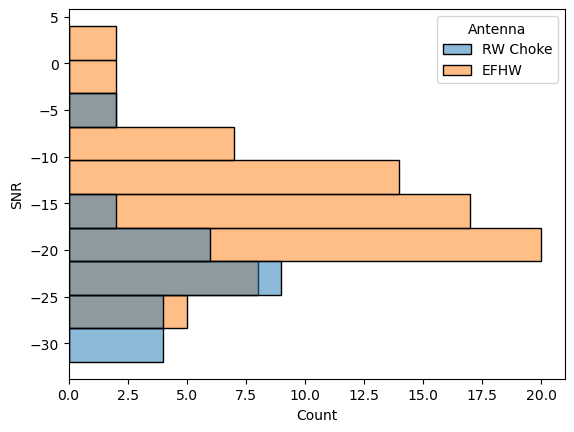

In [5]:
seaborn.histplot(rx_spots, hue="Antenna", y="SNR")